In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

This notebook will illustrate the uniformity in time of the method of averaging applied to the following fast-slow system

\begin{align}
dX_t &= - (Y_t+X_t)dt + \sqrt{2}dW_t \\
dY_t &= -\frac{1}{\epsilon}V'(Y_t)dt + \frac{1}{\sqrt{\epsilon}}\sqrt{2}dW_t
\end{align}

The cell below defines the different potentials $V'(y)$ for the slow process:


"conv" : $V'(y) = -y$

"doubleWell" : $V'(y) = -y(y+2)(y-2)$

which correspond to the following potentials V(y):

Text(0.5, 1.0, 'Convex')

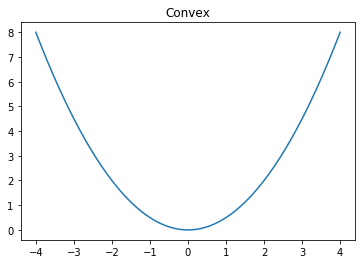

In [2]:
y = np.linspace(-4,4,1000)
plt.plot(y,y**2/2)
plt.title("Convex")

Text(0.5, 1.0, 'Double well')

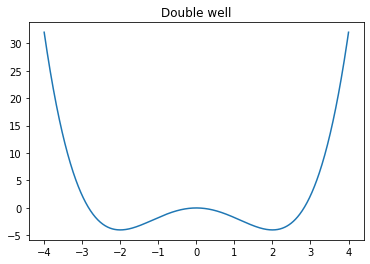

In [3]:
y = np.linspace(-4,4,1000)
plt.plot(y,y**4/4-2*y**2)
plt.title("Double well")

In [4]:
def potential(y, x, driftType):
    if (driftType == "conv"):
        return(-y)
    if (driftType == "doubleWell"):
        return(-y*(y+2)*(y-2))    

In [5]:
def dynamics(y, x,x_avged, driftType):
    
    means = np.zeros(n_steps)
    var = np.zeros(n_steps)
    means[0] = 0
    var[0] = 0
    x_list = []
    x_avged_list = []
    
    for i in range(n_steps):
        y = y + (1/epsilon)*potential(y, x, driftType)*h + (np.sqrt(2)*sqrth/sqrtEp) * np.random.randn(n_particles)
        x= x - (y+x)*h + sqrth * np.random.randn(n_particles)   
        x_avged = x_avged - x_avged*h + sqrth * np.random.randn(n_particles)
        
        means[i] = np.abs(np.mean(x - x_avged))
        var[i] = np.abs(np.mean(x**2-x_avged**2))
        
        if(i%(n_steps/20) ==0 or i==n_steps-1):
            print(i)
            x_list.append(x)
            x_avged_list.append(x_avged)
            
    return([means,var, x_list, x_avged_list, y])

1.0
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
99999
0.3981071705534972
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
99999
0.15848931924611134
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
99999
0.0630957344480193
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
99999
0.025118864315095794
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
99999
0.01
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
99999
Stored 'm_listE' (list)
Stored 'v_listE' (list)
Stored 'x_listE' (list)
Stored 'x_avged_listE' (list)
Stored 'y_listE' (list)


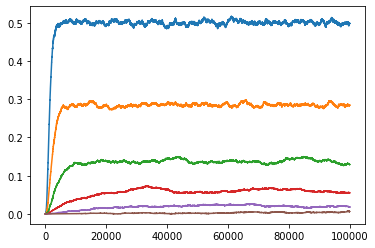

In [122]:
#Figure 1

m_listE = []
v_listE = []
x_listE = []
x_avged_listE = []
y_listE = []

for i in np.linspace(0,2,6):
    n_particles = 10**5 # number of particles

    n_steps = 10**5        # number of timesteps
    t_max = 10**(-i+2)             # final time 
    h = t_max/(n_steps)  # time step
    epsilon = 10**(-i)
    sqrth = np.sqrt(h)
    sqrtEp = np.sqrt(epsilon)
    t = np.linspace(0.,t_max,n_steps)  # times at each time step
    
    print(epsilon)
    
    results = dynamics(np.zeros(n_particles), np.zeros( n_particles), np.zeros( n_particles), "conv")
    m_listE.append(results[0])
    v_listE.append(results[1])
    x_listE.append(results[2])
    x_avged_listE.append(results[3])
    y_listE.append(results[4])

    
%store m_listE
%store v_listE
%store x_listE
%store x_avged_listE
%store y_listE

0.06309573444801933
0
6000
12000
18000
24000
30000
36000
42000
48000
54000
60000
66000
72000
78000
84000
90000
96000
102000
108000
114000
119999
0.039810717055349734
0
7000
14000
21000
28000
35000
42000
49000
56000
63000
70000
77000
84000
91000
98000
105000
112000
119000
126000
133000
139999
0.025118864315095794
0
8000
16000
24000
32000
40000
48000
56000
64000
72000
80000
88000
96000
104000
112000
120000
128000
136000
144000
152000
159999
0.015848931924611134
0
9000
18000
27000
36000
45000
54000
63000
72000
81000
90000
99000
108000
117000
126000
135000
144000
153000
162000
171000
179999
0.01
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
199999
0.00630957344480193
0
11000
22000
33000
44000
55000
66000
77000
88000
99000
110000
121000
132000
143000
154000
165000
176000
187000
198000
209000
219999
Stored 'm_listEz' (list)
Stored 'v_listEz' (list)
Stored 'x_listEz' (list)
Stored 'x_avged_listEz' (list)
Stored 'y

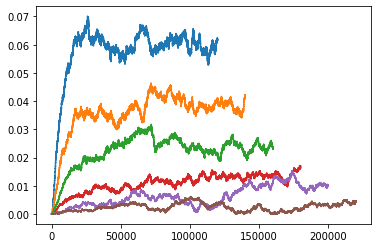

In [12]:
#Also Figure 1, to get a better sense of the behaviour at lower levels of epsilon

m_listEz = []
v_listEz = []
x_listEz = []
x_avged_listEz = []
y_listEz = []

for i in np.linspace(1.2,2.2,6):
    n_particles = 10**5 # number of particles

    n_steps = int(i*10**5)        # number of timesteps
    t_max = 10**(-0.8*i+2)             # final time 
    h = t_max/(n_steps)  # time step
    epsilon = 10**(-i)
    sqrth = np.sqrt(h)
    sqrtEp = np.sqrt(epsilon)
    t = np.linspace(0.,t_max,n_steps)  # times at each time step
    
    print(epsilon)
    
    results = dynamics(np.zeros(n_particles), np.zeros( n_particles), np.zeros( n_particles), "conv")
    m_listEz.append(results[0])
    v_listEz.append(results[1])
    x_listEz.append(results[2])
    x_avged_listEz.append(results[3])
    y_listEz.append(results[4])
    plt.plot(v_listEz[-1])

    
%store m_listEz
%store v_listEz
%store x_listEz
%store x_avged_listEz
%store y_listEz

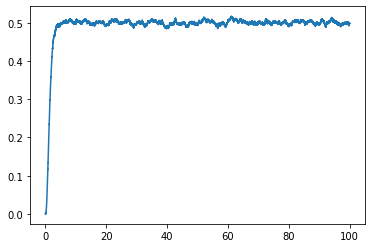

In [46]:
j=0
for i in np.linspace(0,0,1):
    n_particles = 10**5 # number of particles

    n_steps = 10**5        # number of timesteps
    t_max = 10**(-i+2)             # final time 
    h = t_max/(n_steps)  # time step
    epsilon = 10**(-i)
    sqrth = np.sqrt(h)
    sqrtEp = np.sqrt(epsilon)
    t = np.linspace(0.,t_max,n_steps)  # times at each time step
    plt.plot(t, v_listE[j])

    j+=1

In [159]:
vE = []
for data in v_listE:
    vE.append(np.mean(data[-1000:]))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


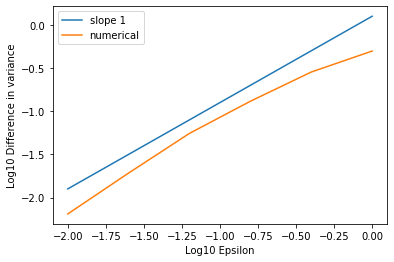

In [262]:
epsilonsE = np.reshape(np.array([np.linspace(0,2,6)]), (6,))
plt.plot(-np.array(epsilonsE),-np.array(epsilonsE)+0.1, label = "slope 1")
plt.plot(-np.array(epsilonsE), np.log10(vE), label = "numerical")
plt.ylabel("Log10 Difference in variance")
plt.xlabel("Log10 Epsilon")
plt.legend()
plt.savefig("ConvInEps.eps", format = "eps")

/home/s1992251/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  if __name__ == '__main__':
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


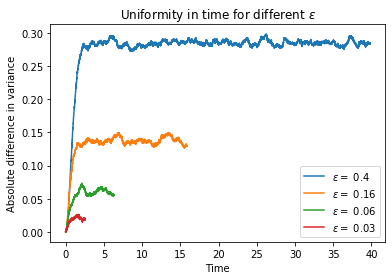

In [254]:
plt.plot(np.linspace(0,10**(-0.4+2),100000),v_listE[1], label = "$\epsilon = $ {}".format(np.round(10**(-0.4),2)))
plt.plot(np.linspace(0,10**(-0.8+2),100000), v_listE[2], label = "$\epsilon = $ {}".format(np.round(10**(-0.8),2)))
plt.plot(np.linspace(0,10**(-1.2+2),100000), v_listE[3], label = "$\epsilon = $ {}".format(np.round(10**(-1.2),2)))
plt.plot(np.linspace(0,10**(-1.6+2),100000), v_listE[4], label = "$\epsilon = $ {}".format(np.round(10**(-1.6),2)))
plt.title("Uniformity in time for different $\epsilon$")
plt.xlabel("Time")
plt.legend()
plt.ylabel("Absolute difference in variance")
plt.savefig("uItMult.eps", format = "eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


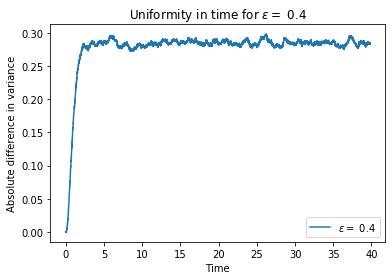

In [255]:
plt.plot(np.linspace(0,10**(-0.4+2),100000),v_listE[1], label = "$\epsilon = $ {}".format(np.round(10**(-0.4),2)))
plt.title("Uniformity in time for $\epsilon = $ {}".format(np.round(10**(-0.4),2)))
plt.xlabel("Time")
plt.legend()
plt.ylabel("Absolute difference in variance")
plt.savefig("uIt.eps", format = "eps")

1.0
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
99999
0.251188643150958
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
99999
0.06309573444801933
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
99999
0.01584893192461114
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
99999
0.003981071705534973
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
99999
0.001
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
99999
Stored 'm_listEDW' (list)
Stored 'v_listEDW' (list)
Stored 'x_listEDW' (list)
Stored 'x_avged_listEDW' (list)
Stored 'y_listEDW' (list)


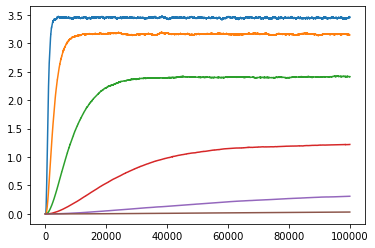

In [270]:
m_listEDW = []
v_listEDW = []
x_listEDW = []
x_avged_listEDW = []
y_listEDW = []

for i in np.linspace(0,3,6):
    n_particles = 10**5 # number of particles

    n_steps = 10**5        # number of timesteps
    t_max = 2*10**(-i+2)             # final time 
    h = t_max/(n_steps)  # time step
    epsilon = 10**(-i)
    sqrth = np.sqrt(h)
    sqrtEp = np.sqrt(epsilon)
    t = np.linspace(0.,t_max,n_steps)  # times at each time step
    
    print(epsilon)
    
    results = dynamics(np.zeros(n_particles), np.zeros( n_particles), np.zeros( n_particles), "doubleWell")
    m_listEDW.append(results[0])
    v_listEDW.append(results[1])
    x_listEDW.append(results[2])
    x_avged_listEDW.append(results[3])
    y_listEDW.append(results[4])
    plt.plot(v_listEDW[-1])

    
%store m_listEDW
%store v_listEDW
%store x_listEDW
%store x_avged_listEDW
%store y_listEDW

In [272]:
vEDW = []
for data in v_listEDW:
    vEDW.append(np.mean(data[-1000:]))

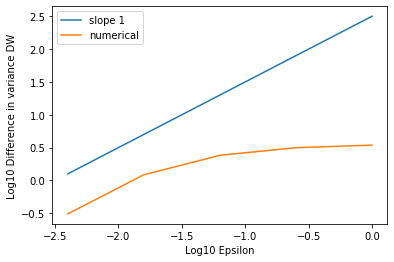

In [55]:
epsilonsEz = np.reshape(np.array([np.linspace(1.2,2.2,6)]), (6,))
epsilonsEDW = np.reshape(np.array([np.linspace(0,3,6)[0:5]]), (5,))
plt.plot(-np.array(epsilonsEDW),-np.array(epsilonsEDW)+2.5, label = "slope 1")
plt.plot(-np.array(epsilonsEDW), np.log10(vEDW[0:5]), label = "numerical")
#plt.plot(-np.array(epsilonsEz), np.log10(vEz), label = "numerical")
plt.ylabel("Log10 Difference in variance DW")
plt.xlabel("Log10 Epsilon")
plt.legend()
#plt.savefig("ConvInEpsDW.eps", format = "eps")

In [52]:
vEDW = []
for data in v_listEDW:
    vEDW.append(np.mean(data[-1000:]))

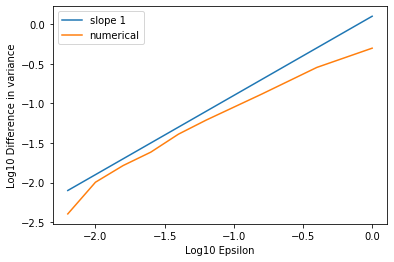

In [98]:
epsilonsEz = np.reshape(np.array([np.linspace(1.2,2.2,6)]), (6,))
plt.plot(-np.concatenate((np.array([0,0.4,0.8]),np.array(epsilonsEz))),-np.concatenate((np.array([0,0.4,0.8]),np.array(epsilonsEz)))+0.1, label = "slope 1")
plt.plot(-np.concatenate((np.array([0,0.4,0.8]),np.array(epsilonsEz))), np.log10(np.concatenate((vE[0:3], vEz))), label = "numerical")
plt.ylabel("Log10 Difference in variance")
plt.xlabel("Log10 Epsilon")
plt.legend()
#plt.savefig("ConvInEpsz.eps", format = "eps")

0.1
0
6000
12000
18000
24000
30000
36000
42000
48000
54000
60000
66000
72000
78000
84000
90000
96000
102000
108000
114000
119999
Stored 'm_listEDWz' (list)
Stored 'v_listEDWz' (list)
Stored 'x_listEDWz' (list)
Stored 'x_avged_listEDWz' (list)
Stored 'y_listEDWz' (list)
0.052749970637026196
0
126232
Stored 'm_listEDWz' (list)
Stored 'v_listEDWz' (list)
Stored 'x_listEDWz' (list)
Stored 'x_avged_listEDWz' (list)
Stored 'y_listEDWz' (list)
0.027825594022071243
0
132790
Stored 'm_listEDWz' (list)
Stored 'v_listEDWz' (list)
Stored 'x_listEDWz' (list)
Stored 'x_avged_listEDWz' (list)
Stored 'y_listEDWz' (list)
0.01467799267622069
0
13969
27938
41907
55876
69845
83814
97783
111752
125721
139689
Stored 'm_listEDWz' (list)
Stored 'v_listEDWz' (list)
Stored 'x_listEDWz' (list)
Stored 'x_avged_listEDWz' (list)
Stored 'y_listEDWz' (list)
0.007742636826811269
0
146945
Stored 'm_listEDWz' (list)
Stored 'v_listEDWz' (list)
Stored 'x_listEDWz' (list)
Stored 'x_avged_listEDWz' (list)
Stored 'y_listEDWz

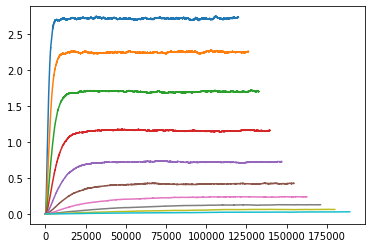

In [8]:
m_listEDWz = []
v_listEDWz = []
x_listEDWz = []
x_avged_listEDWz = []
y_listEDWz = []

for i in np.linspace(1,3.5,10):
    n_particles = 10**5 # number of particles

    n_steps = int(1.2**i * 10**5)        # number of timesteps
    t_max = 5*10**(-0.8*i+2)             # final time 
    h = t_max/(n_steps)  # time step
    epsilon = 10**(-i)
    sqrth = np.sqrt(h)
    sqrtEp = np.sqrt(epsilon)
    t = np.linspace(0.,t_max,n_steps)  # times at each time step
    
    print(epsilon)
    
    results = dynamics(np.zeros(n_particles), np.zeros( n_particles), np.zeros( n_particles), "doubleWell")
    m_listEDWz.append(results[0])
    v_listEDWz.append(results[1])
    x_listEDWz.append(results[2])
    x_avged_listEDWz.append(results[3])
    y_listEDWz.append(results[4])
    plt.plot(v_listEDWz[-1])
    %store m_listEDWz
    %store v_listEDWz
    %store x_listEDWz
    %store x_avged_listEDWz
    %store y_listEDWz

    


In [73]:
vEDWz = []
for data in v_listEDWz:
    vEDWz.append(np.mean(data[-1000:]))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


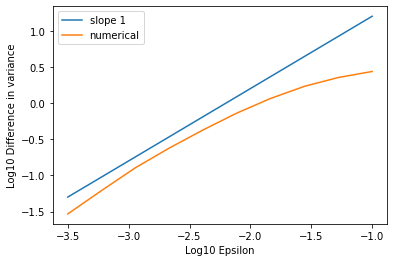

In [67]:
epsilonsEDWz = np.reshape(np.array([np.linspace(1,3.5,10)]), (10,))
plt.plot(-np.array(epsilonsEDWz),-np.array(epsilonsEDWz)+2.2, label = "slope 1")
plt.plot(-np.array(epsilonsEDWz), np.log10(vEDWz), label = "numerical")
plt.ylabel("Log10 Difference in variance")
plt.xlabel("Log10 Epsilon")
plt.legend()
plt.savefig("ConvInEpszDWRange.eps", format = "eps")

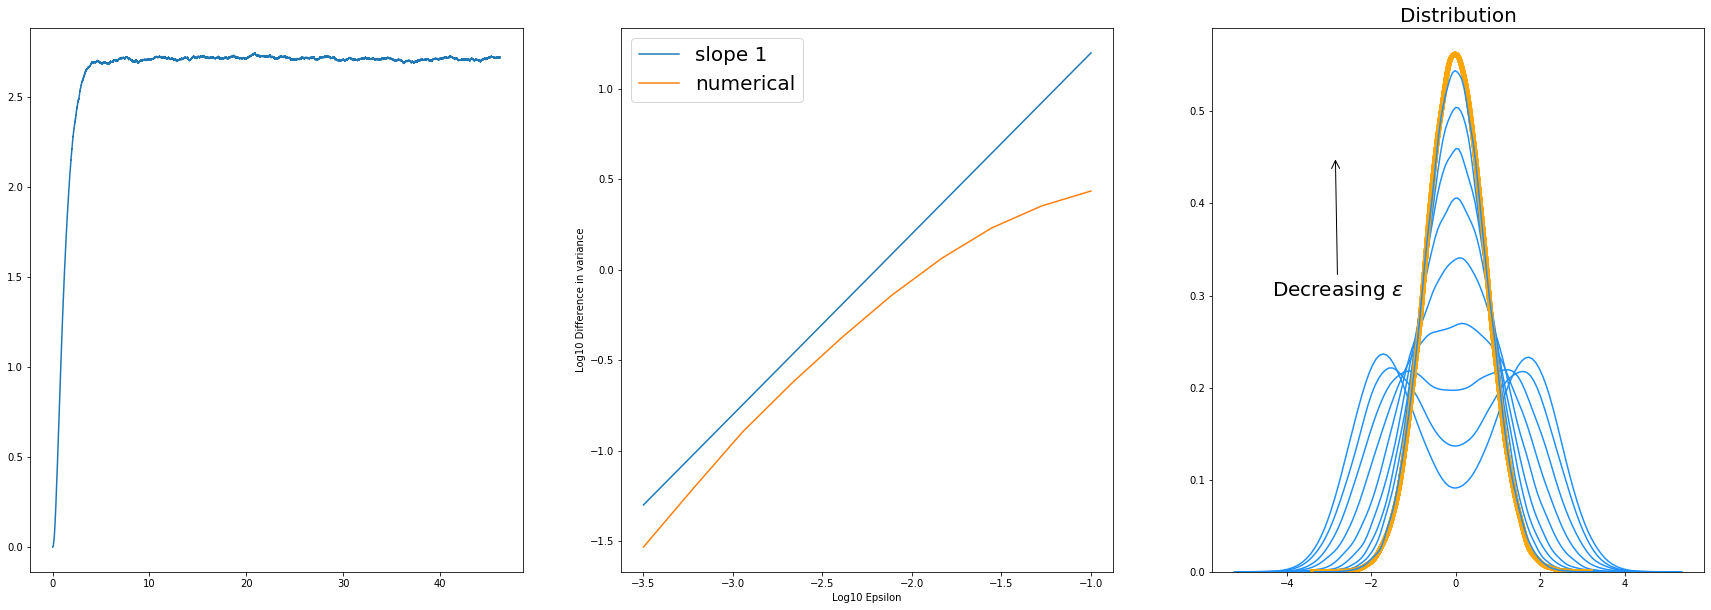

In [82]:
#Figure 2

fig, axes = plt.subplots(1,3,sharex = False, sharey = False, figsize = (30,10))
epsilonsEDWz = np.reshape(np.array([np.linspace(1,3.5,10)]), (10,))

#fig.tight_layout()

i=1
n_steps = int(1.2**i * 10**5)        # number of timesteps
t_max = 5*10**(-0.8*i+2)
t = np.linspace(0.,t_max,n_steps)
axes[0].plot(np.array(t)[0:70000],v_listEDWz[0][0:70000])

epsilonsEDWz = np.reshape(np.array([np.linspace(1,3.5,10)]), (10,))
axes[1].plot(-np.array(epsilonsEDWz),-np.array(epsilonsEDWz)+2.2, label = "slope 1")
axes[1].plot(-np.array(epsilonsEDWz), np.log10(vEDWz), label = "numerical")
axes[1].set_ylabel("Log10 Difference in variance")
axes[1].set_xlabel("Log10 Epsilon")
axes[1].legend(prop={'size': 20})


for i in range(9):
    EDWz = 10**(-epsilonsEDWz[i])
    sns.distplot(x_avged_listEDWz[0][-1] , color="orange", ax=axes[2], hist = False,kde_kws = {'linewidth': 5})
    sns.distplot(x_listEDWz[i][-1] , color="dodgerblue", ax=axes[2], hist = False)
    axes[2].set_title("Distribution", size = 20)
axes[2].annotate("Decreasing $\epsilon$", xy=(-2.85, 0.45), xytext=(-4.35, 0.3), arrowprops=dict(arrowstyle="->"), size = 20)





#plt.suptitle("Double Well", y=0.95, size = 20)
        
plt.savefig("Double_Well.png", dpi = 300)

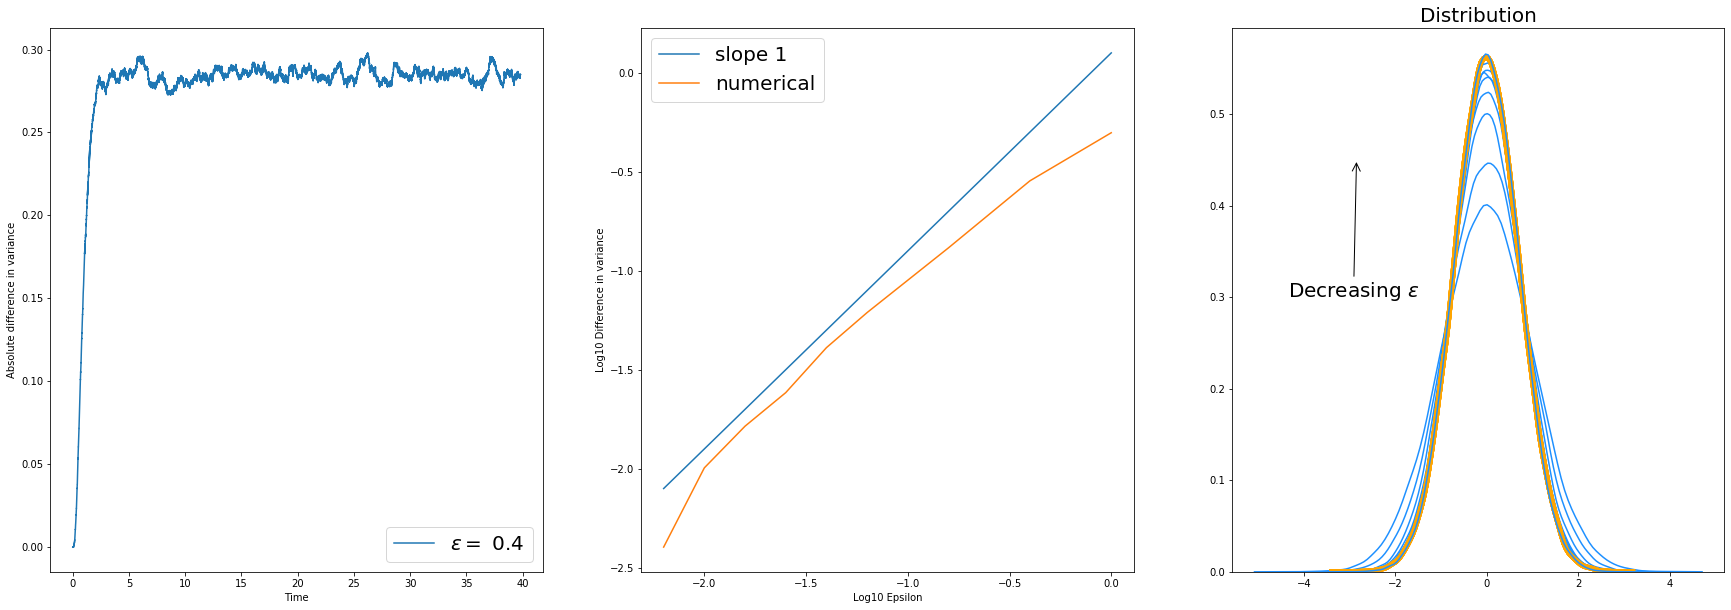

In [109]:
#Figure 1

fig, axes = plt.subplots(1,3,sharex = False, sharey = False, figsize = (30,10))
epsilonsEDWz = np.reshape(np.array([np.linspace(1,3.5,10)]), (10,))

#fig.tight_layout()
axes[0].plot(np.linspace(0,10**(-0.4+2),100000),v_listE[1], label = "$\epsilon = $ {}".format(np.round(10**(-0.4),2)))
#axes[0].title("Uniformity in time for $\epsilon = $ {}".format(np.round(10**(-0.4),2)))
axes[0].set_xlabel("Time")
axes[0].legend(prop={'size': 20})
axes[0].set_ylabel("Absolute difference in variance")


epsilonsEz = np.reshape(np.array([np.linspace(1.2,2.2,6)]), (6,))
axes[1].plot(-np.concatenate((np.array([0,0.4,0.8]),np.array(epsilonsEz))),-np.concatenate((np.array([0,0.4,0.8]),np.array(epsilonsEz)))+0.1, label = "slope 1")
axes[1].plot(-np.concatenate((np.array([0,0.4,0.8]),np.array(epsilonsEz))), np.log10(np.concatenate((vE[0:3], vEz))), label = "numerical")
axes[1].set_ylabel("Log10 Difference in variance")
axes[1].set_xlabel("Log10 Epsilon")
axes[1].legend(prop={'size': 20})

for i in range(9):
    EDWz = 10**(-epsilonsEDWz[i])
    sns.distplot(x_avged_listEDWz[0][-1] , color="orange", ax=axes[2], hist = False,kde_kws = {'linewidth': 5})
    sns.distplot(test1[i] , color="dodgerblue", ax=axes[2], hist = False)
    axes[2].set_title("Distribution", size = 20)
axes[2].annotate("Decreasing $\epsilon$", xy=(-2.85, 0.45), xytext=(-4.35, 0.3), arrowprops=dict(arrowstyle="->"), size = 20)





#plt.suptitle("Double Well", y=0.95, size = 20)
        
plt.savefig("Conv.png", dpi = 300)

0.03162277660168379
0
131452
Stored 'm_listEDWz1' (list)
Stored 'v_listEDWz1' (list)
Stored 'x_listEDWz1' (list)
Stored 'x_avged_listEDWz1' (list)
Stored 'y_listEDWz1' (list)
0.027825594022071243
0
132790
Stored 'm_listEDWz1' (list)
Stored 'v_listEDWz1' (list)
Stored 'x_listEDWz1' (list)
Stored 'x_avged_listEDWz1' (list)
Stored 'y_listEDWz1' (list)
0.024484367468222266
0
134142
Stored 'm_listEDWz1' (list)
Stored 'v_listEDWz1' (list)
Stored 'x_listEDWz1' (list)
Stored 'x_avged_listEDWz1' (list)
Stored 'y_listEDWz1' (list)
0.021544346900318832
0
135508
Stored 'm_listEDWz1' (list)
Stored 'v_listEDWz1' (list)
Stored 'x_listEDWz1' (list)
Stored 'x_avged_listEDWz1' (list)
Stored 'y_listEDWz1' (list)
0.018957356524063752
0
136887
Stored 'm_listEDWz1' (list)
Stored 'v_listEDWz1' (list)
Stored 'x_listEDWz1' (list)
Stored 'x_avged_listEDWz1' (list)
Stored 'y_listEDWz1' (list)
0.016681005372000592
0
138281
Stored 'm_listEDWz1' (list)
Stored 'v_listEDWz1' (list)
Stored 'x_listEDWz1' (list)
Stored 

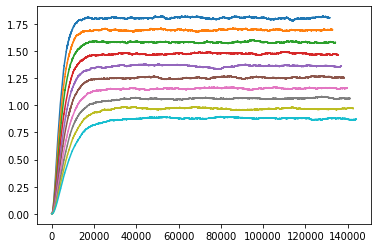

In [23]:
m_listEDWz1 = []
v_listEDWz1 = []
x_listEDWz1 = []
x_avged_listEDWz1 = []
y_listEDWz1 = []

for i in np.linspace(1.5,2,10):
    n_particles = 10**5 # number of particles

    n_steps = int(1.2**i * 10**5)        # number of timesteps
    t_max = 5*10**(-0.8*i+2)             # final time 
    h = t_max/(n_steps)  # time step
    epsilon = 10**(-i)
    sqrth = np.sqrt(h)
    sqrtEp = np.sqrt(epsilon)
    t = np.linspace(0.,t_max,n_steps)  # times at each time step
    
    print(epsilon)
    
    results = dynamics(np.zeros(n_particles), np.zeros( n_particles), np.zeros( n_particles), "doubleWell")
    m_listEDWz1.append(results[0])
    v_listEDWz1.append(results[1])
    x_listEDWz1.append(results[2])
    x_avged_listEDWz1.append(results[3])
    y_listEDWz1.append(results[4])
    plt.plot(v_listEDWz1[-1])
    %store m_listEDWz1
    %store v_listEDWz1
    %store x_listEDWz1
    %store x_avged_listEDWz1
    %store y_listEDWz1


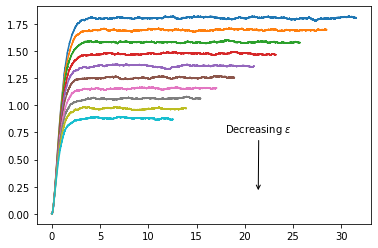

In [80]:
j = 0
for i in np.linspace(1.5,2,10):
    n_particles = 10**5 # number of particles

    n_steps = int(1.2**i * 10**5)        # number of timesteps
    t_max = 5*10**(-0.8*i+2)             # final time 
    h = t_max/(n_steps)  # time step
    epsilon = 10**(-i)
    sqrth = np.sqrt(h)
    sqrtEp = np.sqrt(epsilon)
    t = np.linspace(0.,t_max,n_steps)  # times at each time step
    plt.plot(t, v_listEDWz1[j])
    j+=1
plt.annotate("Decreasing $\epsilon$", xy=(21.4, 0.2), xytext=(18, 0.75), arrowprops=dict(arrowstyle="->"))
plt.savefig("uItMultDW", format = "eps")

In [10]:
vEDWz1 = []
for data in v_listEDWz1:
    vEDWz1.append(np.mean(data[-1000:]))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


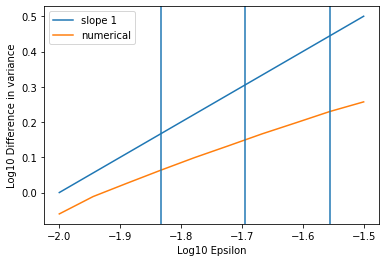

In [12]:
epsilonsEDWz1 = np.reshape(np.array([np.linspace(1.5,2,10)]), (10,))
plt.plot(-np.array(epsilonsEDWz1),-np.array(epsilonsEDWz1)+2, label = "slope 1")
plt.plot(-np.array(epsilonsEDWz1), np.log10(vEDWz1), label = "numerical")
plt.ylabel("Log10 Difference in variance")
plt.xlabel("Log10 Epsilon")
plt.axvline(x=-1.8333333)
plt.axvline(x=(-1.55555556 - 1.8333333)/2)

plt.axvline(x=-1.55555556)
plt.legend()
plt.savefig("ConvInEpszDWLines.eps", format = "eps")

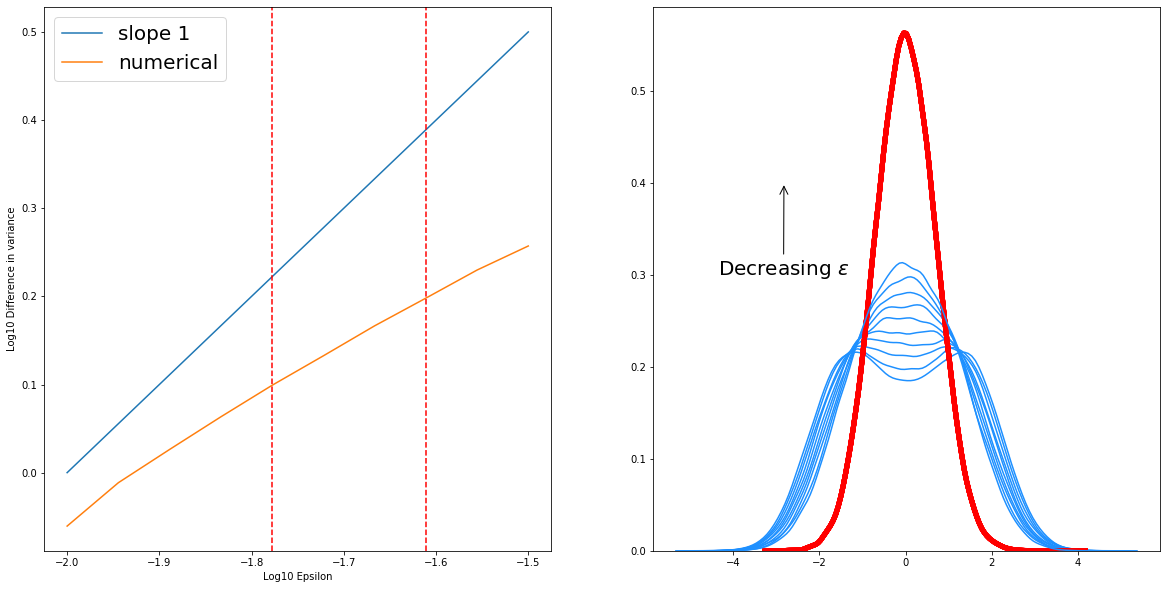

In [33]:
#Figure 2

fig, axes = plt.subplots(1,2, figsize = (20,10))
epsilonsEDWz1 = np.reshape(np.array([np.linspace(1.5,2,10)]), (10,))

axes[0].plot(-np.array(epsilonsEDWz1),-np.array(epsilonsEDWz1)+2, label = "slope 1")
axes[0].plot(-np.array(epsilonsEDWz1), np.log10(vEDWz1), label = "numerical")
axes[0].set_ylabel("Log10 Difference in variance")
axes[0].set_xlabel("Log10 Epsilon")
axes[0].axvline(x=-1.61111111, linestyle="--", color = "red")
axes[0].axvline(x=-1.77777778, linestyle= "--", color = "red")

#axes[0].axvline(x=-1.55555556)
axes[0].legend(prop={'size': 20})
#axes[0].savefig("ConvInEpszDWLines.eps", format = "eps")


for i in range(10):
    EDWz1 = 10**(-epsilonsEDWz1[i])
    sns.distplot(x_avged_listEDWz1[0][-1] , color="red", ax=axes[1], hist = False,kde_kws = {'linewidth': 5})
    sns.distplot(x_listEDWz1[i][-1] , color="dodgerblue", ax=axes[1], hist = False)
    #axes[1].set_title("Epsilon = {}".format(EDWz1))
    #axes.legend()
axes[1].annotate("Decreasing $\epsilon$", xy=(-2.82, 0.4), xytext=(-4.35, 0.3), arrowprops=dict(arrowstyle="->"), size = 20)
#plt.suptitle("Convergence of distribution in Epsilon DW", y=0.92, size = 20)
        
plt.savefig("Transition.png", dpi = 300)